In [179]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.io as sio

import sys
sys.path.append('..')

from helper import kmeans as km

         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


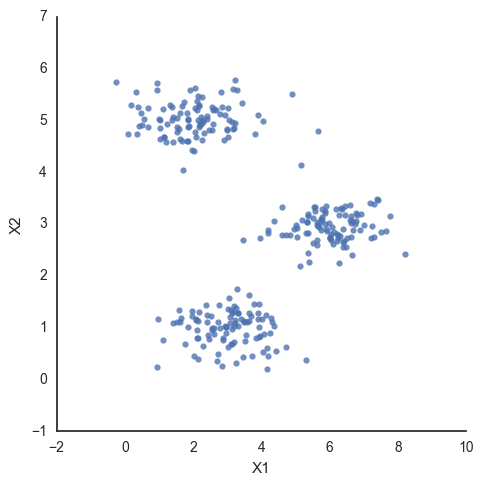

In [180]:
mat = sio.loadmat('./data/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
print(data2.head())

sns.set(context="notebook", style="white")
sns.lmplot('X1', 'X2', data=data2, fit_reg=False)

# 0. random init

In [181]:
km.random_init(data2, 3)

array([[ 2.1270185 ,  0.95672042],
       [ 3.56478625,  1.11764714],
       [ 3.02836363,  1.35635189]])

# 1. cluster assignment
http://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

### find closest cluster

In [182]:
init_centroids = km.random_init(data2, 3)
init_centroids

array([[ 3.48444387,  1.13551448],
       [ 2.96979716,  1.01210306],
       [ 2.1159935 ,  0.7930365 ]])

In [183]:
x = np.array([1, 1])

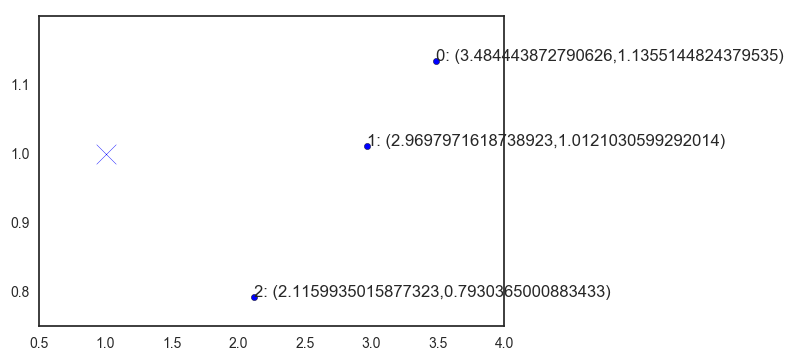

In [184]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=init_centroids[:, 0], y=init_centroids[:, 1])

for i, node in enumerate(init_centroids):
    ax.annotate('{}: ({},{})'.format(i, node[0], node[1]), node)
    
ax.scatter(x[0], x[1], marker='x', s=200)

In [185]:
km._find_your_cluster(x, centroids)

2

### 1 epoch cluster assigning

In [186]:
C = km.assign_cluster(data2, init_centroids)
data_with_c = km.combine_data_C(data2, C)
data_with_c.head()

,X1,X2,C
0,1.842080,4.607572,1
1,5.658583,4.799964,0
2,6.352579,3.290854,0
3,2.904017,4.612204,0
4,3.231979,4.939894,0


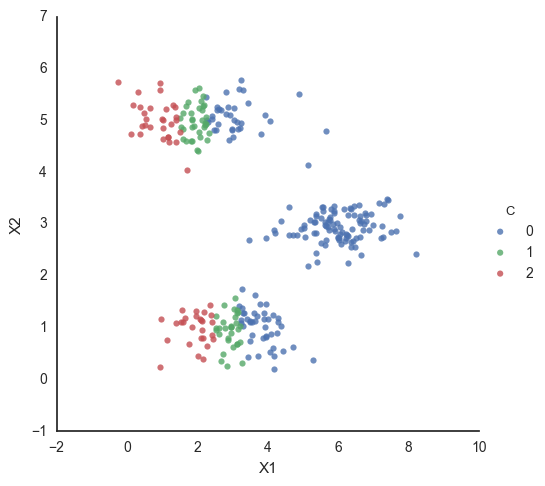

In [187]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)

# 2. calculate new centroid
so you could update later

In [188]:
km.new_centroids(data2, C)

array([[ 4.90392496,  2.91331573],
       [ 2.41315441,  3.08614197],
       [ 1.36929414,  3.10154358]])

# putting all together, take1
this is just 1 shot `k-means`, if the random init pick the bad starting point, the final clustering may be very sub-optimal

In [193]:
final_C, final_centroid, _= km._k_means_iter(data2, 3)
data_with_c = km.combine_data_C(data2, final_C)

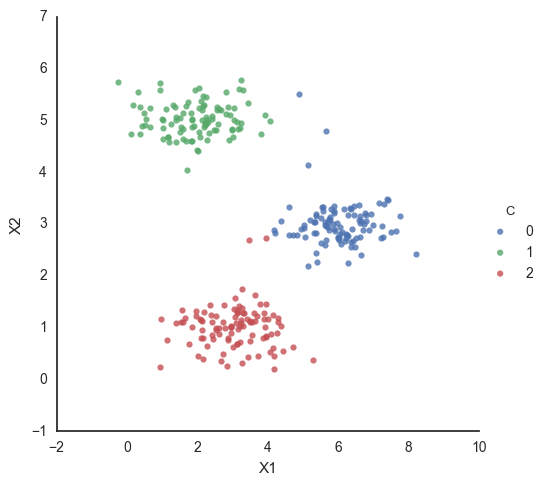

In [194]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)

# calculate the cost

In [195]:
km.cost(data2, final_centroid, final_C)

0.79417636337158704

# k-mean with multiple tries of randome init, pick the best one with least cost

In [197]:
best_C, best_centroids, least_cost = km.k_means(data2, 3)

In [198]:
least_cost

0.79417636337158704

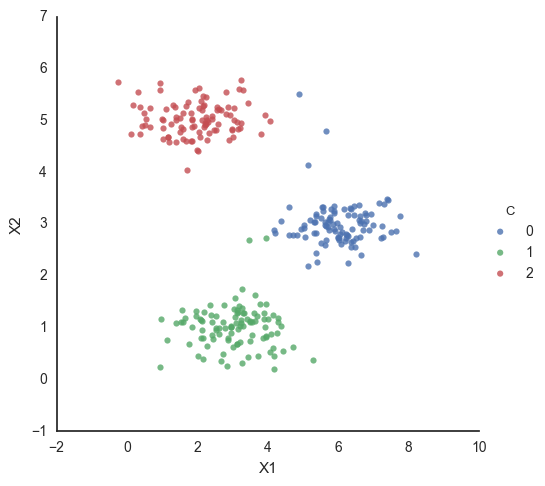

In [199]:
data_with_c = km.combine_data_C(data2, best_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)